In [2]:
!pip install lifelines

  Stored in directory: C:\Users\Bhanupriya\AppData\Local\pip\Cache\wheels\dc\68\dc\91321c55fba449755524481854f5be70d41912b8f886f908bb
  Stored in directory: C:\Users\Bhanupriya\AppData\Local\pip\Cache\wheels\42\62\66\1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
Successfully built autograd-gamma autograd


In [3]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [4]:
# Loading the the survival un-employment data
survival_unemp = pd.read_csv("survival_unemployment.csv")

In [7]:
survival_unemp.head()
#survival_unemp.describe()

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [8]:
survival_unemp["spell"].describe()

count    3343.000000
mean        6.247981
std         5.611271
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        28.000000
Name: spell, dtype: float64

In [9]:
# Spell is referring to time 
T = survival_unemp.spell

In [10]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

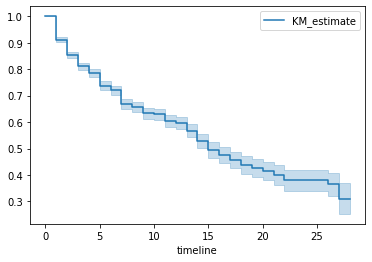

In [17]:
# Fitting KaplanMeierFitter model on Time and Events for death 
kmf.fit(T,event_observed=survival_unemp.event)
# Time-line estimations plot 
kmf.plot()


In [18]:
# Over Multiple groups 
# For each group, here group is ui
survival_unemp.ui.value_counts()

1    1848
0    1495
Name: ui, dtype: int64

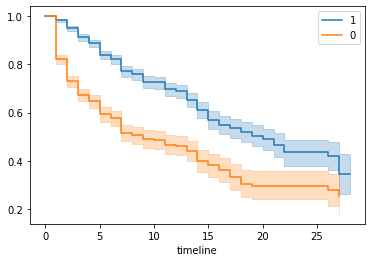

In [19]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
ax = kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[survival_unemp.ui==0], survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot(ax=ax)
